<a href="https://colab.research.google.com/github/kashyapsiddhant/cat_vs_dog_verification_model/blob/main/cat_vs_dog_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 194MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [10]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
#generators to render large datasets in batch

#to train model

train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels='inferred',
    label_mode='int', #cat=0 dog =1 for easy refrence in binary
    batch_size=32,
    image_size=(256,256) #to enable any size image as size not fixed for entry
    )

#to validate and test model
validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels='inferred',
    label_mode='int', #cat=0 dog =1 for easy refrence in binary
    batch_size=32,
    image_size=(256,256) #to enable any size image as size not fixed for entry
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [105]:
#Normalise to get pixel values between 0 to 1 to get accrurate result
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

### **DATA SET READY TO MAKE CNN MODEL**

In [106]:
#create CNN model 3 convulation layer 1st layer=32 filters second layer=64 filters third layer=128 filters
model=Sequential()

#First Layer

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) #Accuracy imporvment methods
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Second Layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #Accuracy imporvment methods
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Third Layer

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #Accuracy imporvment methods
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1)) #Accuracy imporvment methods
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1)) #Accuracy imporvment methods
model.add(Dense(1,activation='sigmoid'))

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [108]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
#store the data for making of graphs and plots
backup= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 107ms/step - loss: 0.9171 - accuracy: 0.5938 - val_loss: 2.0352 - val_accuracy: 0.4996
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5804 - accuracy: 0.6887 - val_loss: 3.5942 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5005 - accuracy: 0.7565 - val_loss: 4.0657 - val_accuracy: 0.5042
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4348 - accuracy: 0.7964 - val_loss: 2.4479 - val_accuracy: 0.5020
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3690 - accuracy: 0.8286 - val_loss: 10.7333 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3002 - accuracy: 0.8650 - val_loss: 6.7284 - val_accuracy: 0.5006
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2569 - accuracy: 0.8891 - val_loss: 162.2835 - val

# **BEFORE APPLYING BATCH NORMALIZATION AND DROPOUT**

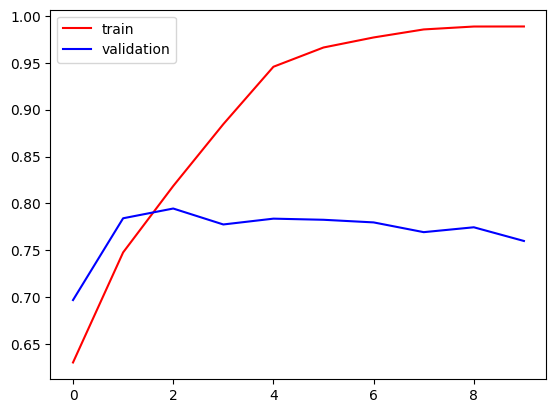

In [20]:
#to plot train vs validation accuracy
#increase in epoch train accuracy improve but validation constaint the gap between them is overfitting
import matplotlib.pyplot as plt
plt.plot(backup.history['accuracy'],color='red',label='train')
plt.plot(backup.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# **AFTER APPLYING BATCH NORMALIZATION AND DROPOUT**

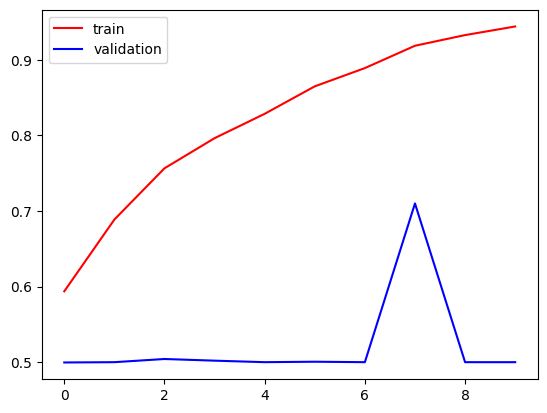

In [110]:
#to plot train vs validation accuracy
#increase in epoch train accuracy improve but validation constaint the gap between them is overfitting
import matplotlib.pyplot as plt
plt.plot(backup.history['accuracy'],color='red',label='train')
plt.plot(backup.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# **BEFORE APPLYING BATCH NORMALIZATION AND DROPOUT**

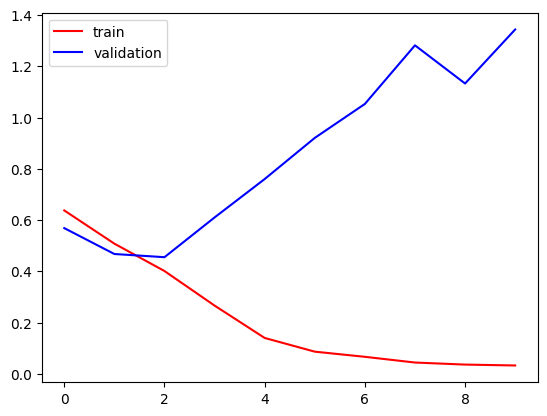

In [21]:
plt.plot(backup.history['loss'],color='red',label='train')
plt.plot(backup.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **AFTER APPLYING BATCH NORMALIZATION AND DROPOUT**

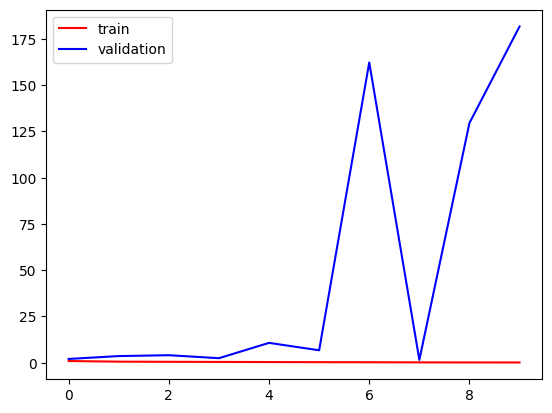

In [111]:
plt.plot(backup.history['loss'],color='red',label='train')
plt.plot(backup.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **SUCCESSFULL IDENTIFICATION OF CAT IMAGE**

In [112]:
import cv2

In [113]:
test_img =cv2.imread('/content/cat.jpg')

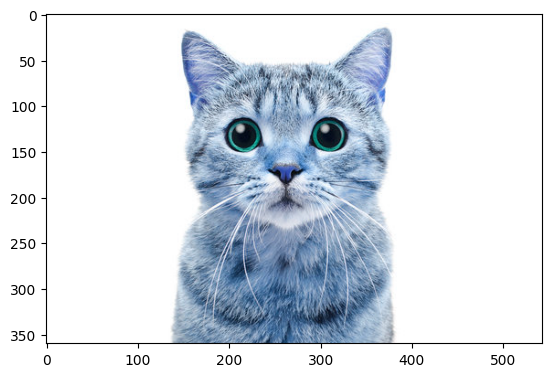

In [114]:
plt.imshow(test_img)

In [115]:
test_img.shape

(360, 543, 3)

In [116]:
test_img =cv2.resize(test_img,(256,256)) #to reshape in the entered size of the model

In [117]:
test_input=test_img.reshape((1,256,256,3)) #image is to be inpu in batch for test and valodation here 1 is batch number and 256,256,3 is pic dimension

In [125]:
model.predict(test_input) #here output 0 is cat

1/1 [==============================] - 0s 26ms/step


array([[0.3737264]], dtype=float32)

# **SUCCESSFULL IDENTIFICATION OF DOG IMAGE BY MODEL**

In [119]:
test_img1=cv2.imread('/content/dog.jpg')

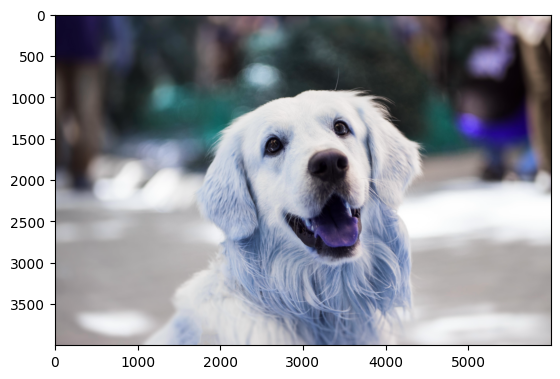

In [120]:
plt.imshow(test_img1)

In [121]:
test_img1.shape

(4000, 6000, 3)

In [122]:
test_img1 =cv2.resize(test_img1,(256,256)) #to reshape in the entered size of the model

In [123]:
test_input1=test_img1.reshape((1,256,256,3)) #image is to be input in batch for test and valodation here 1 is batch number and 256,256,3 is pic dimension

In [124]:
model.predict(test_input1) #here output 1 is dog

1/1 [==============================] - 0s 36ms/step


array([[1.]], dtype=float32)